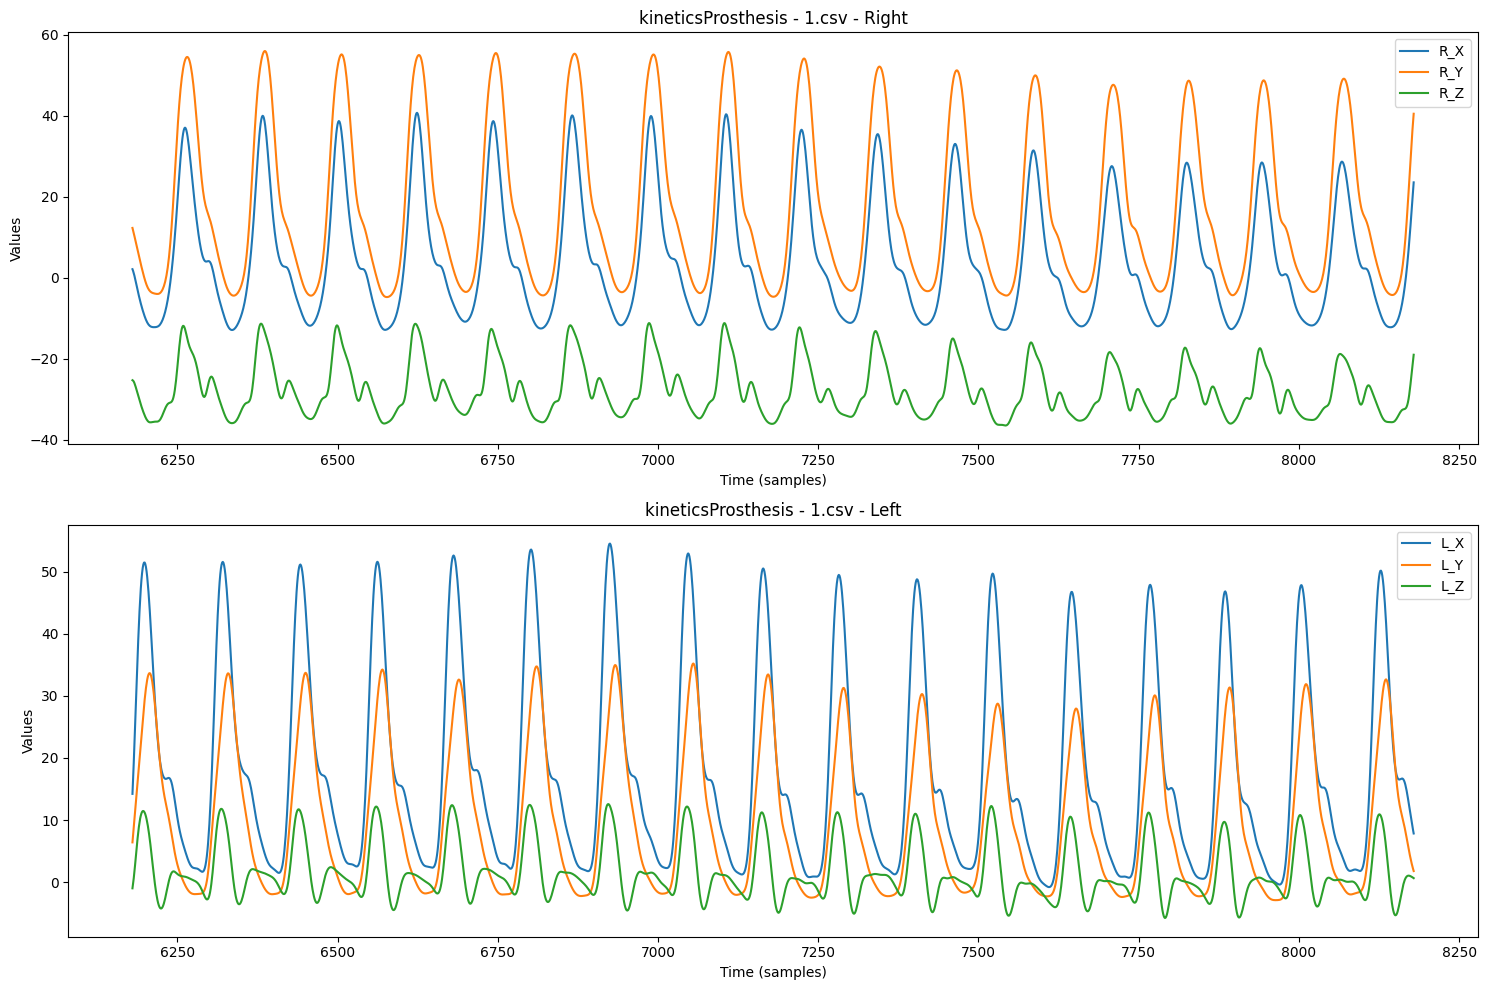

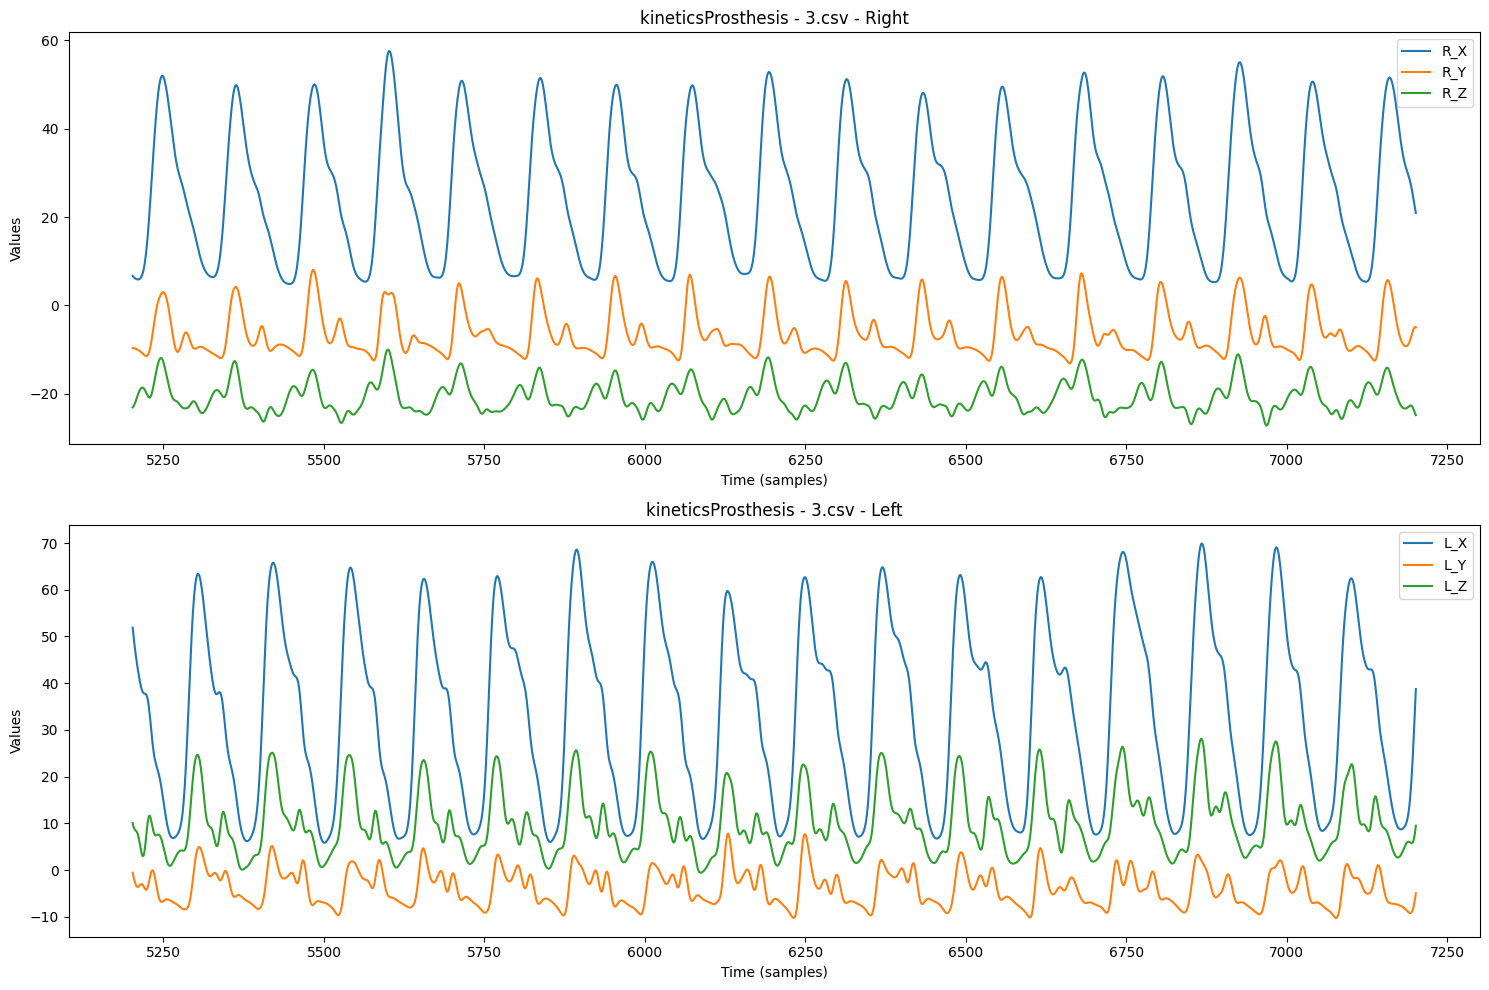

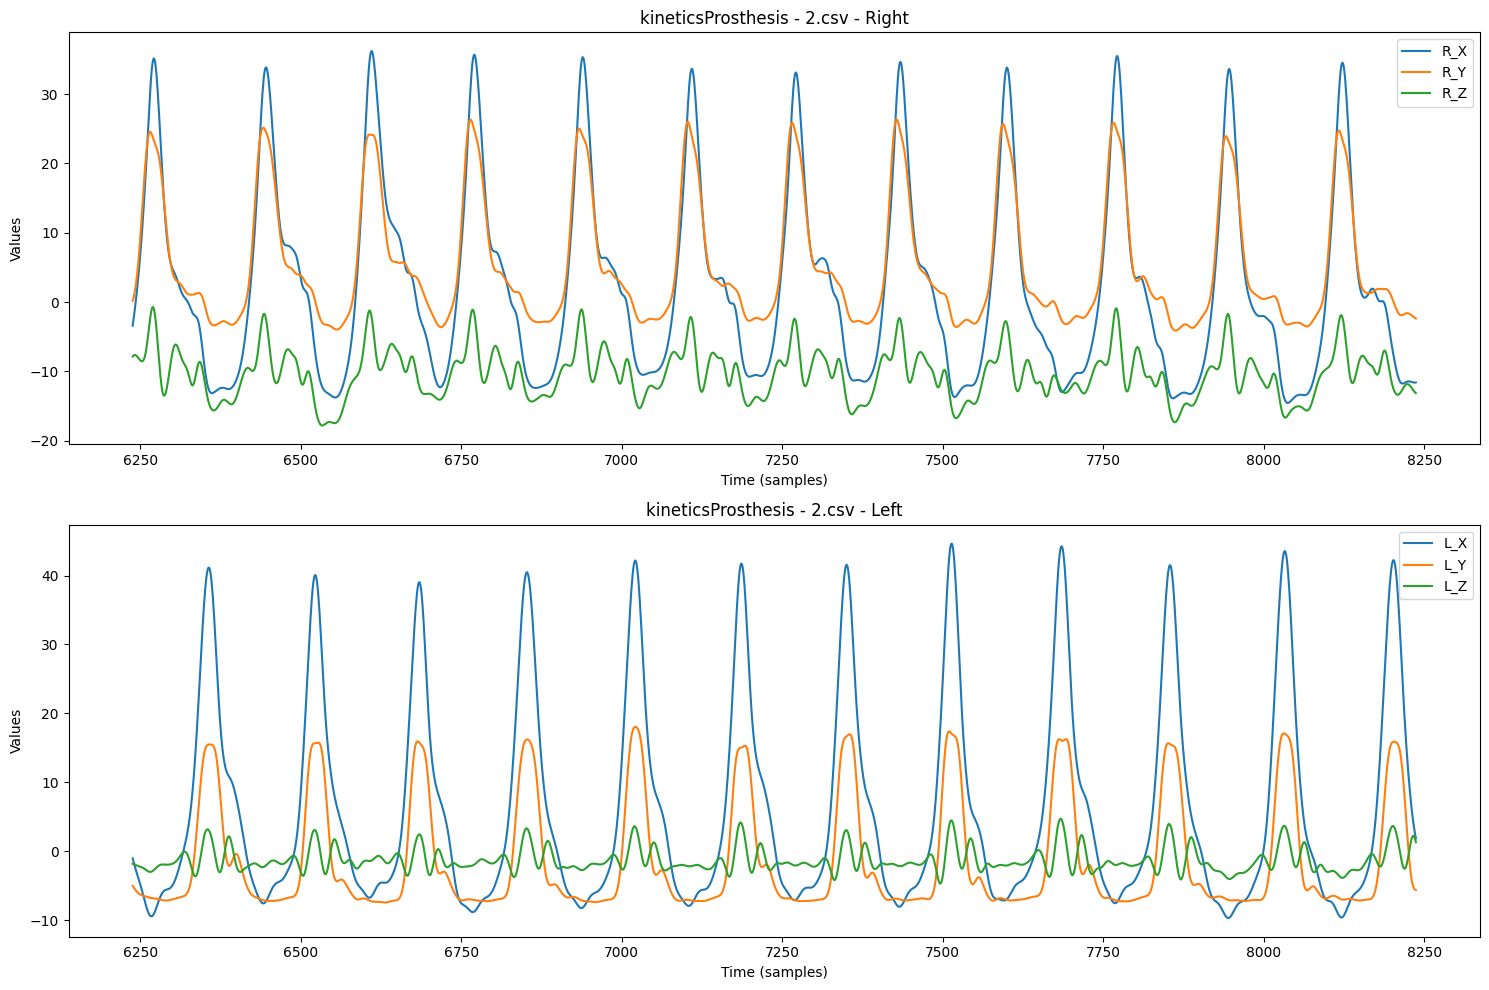

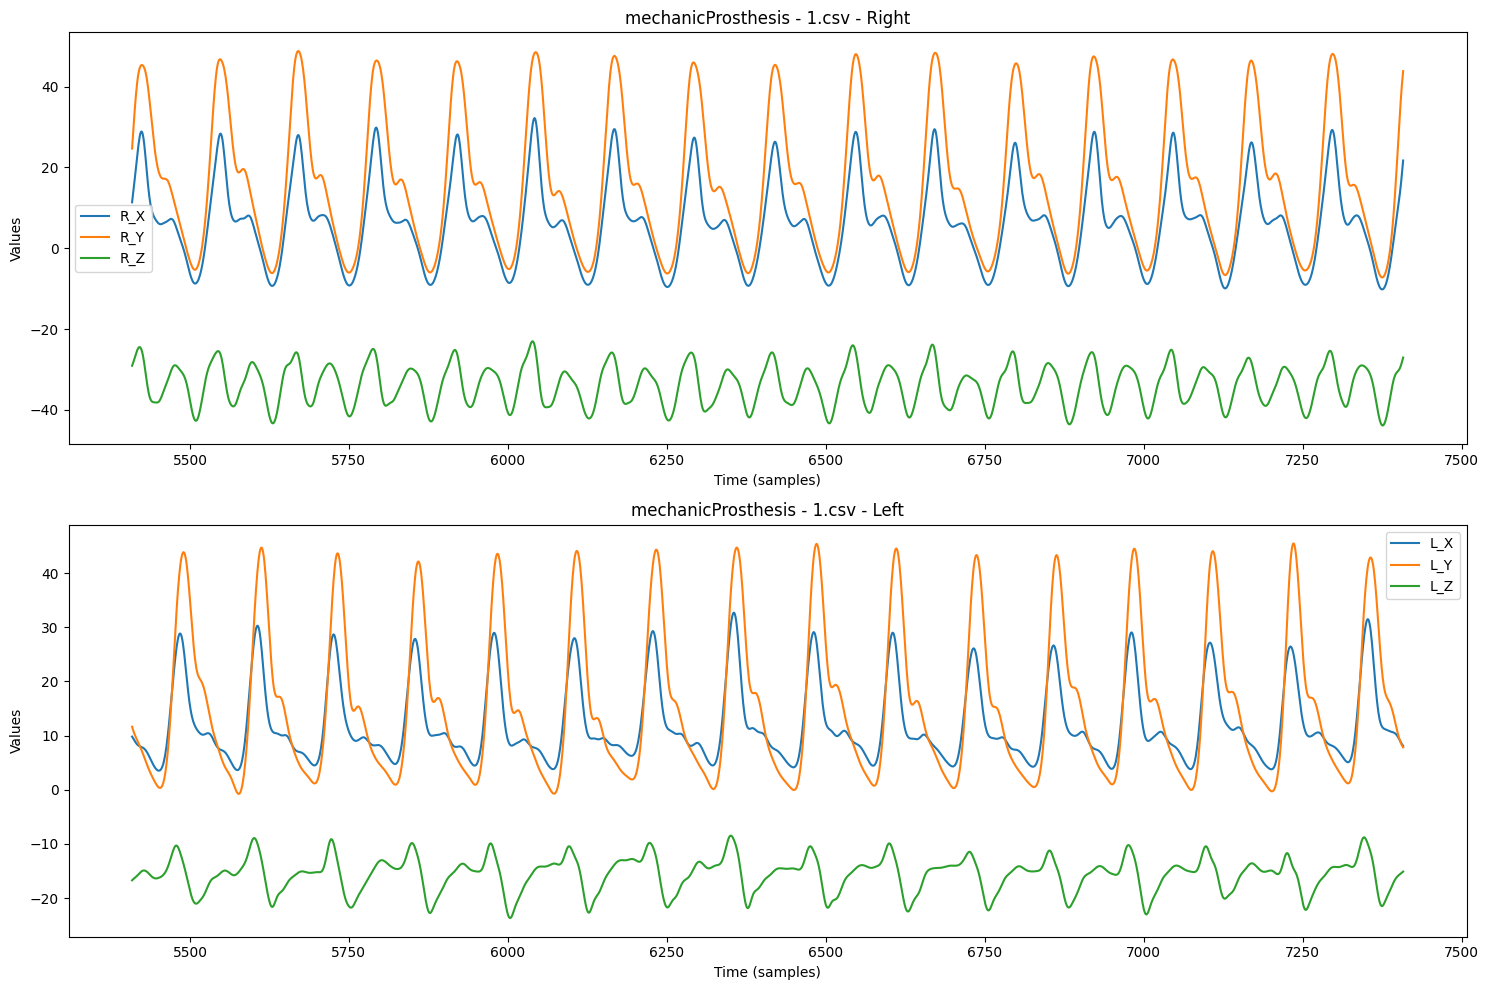

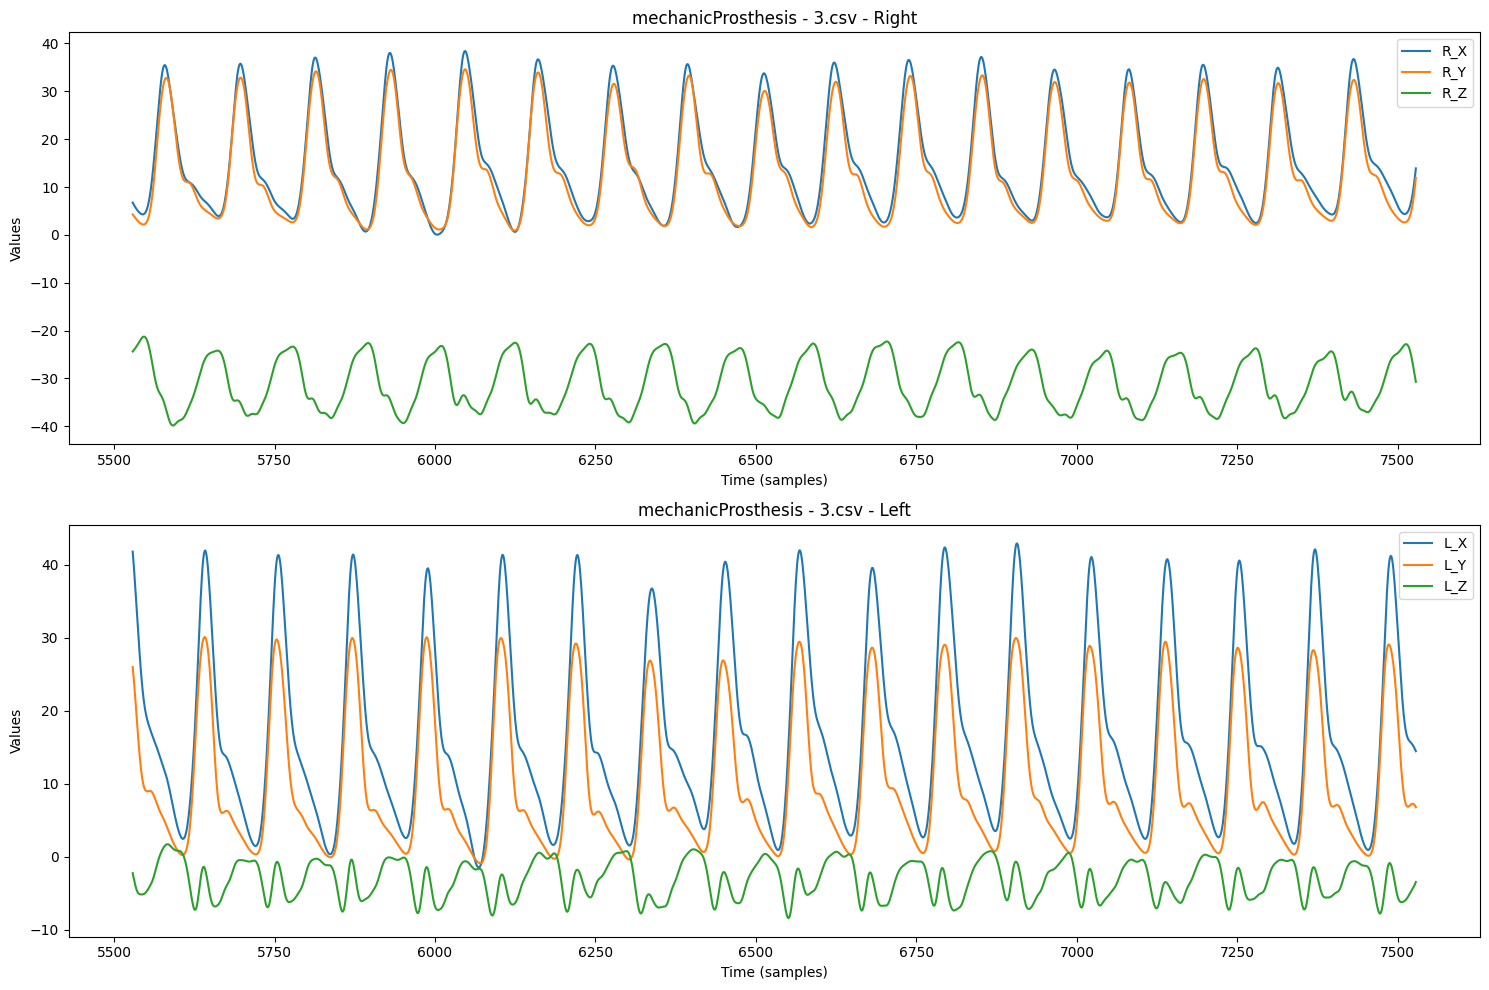

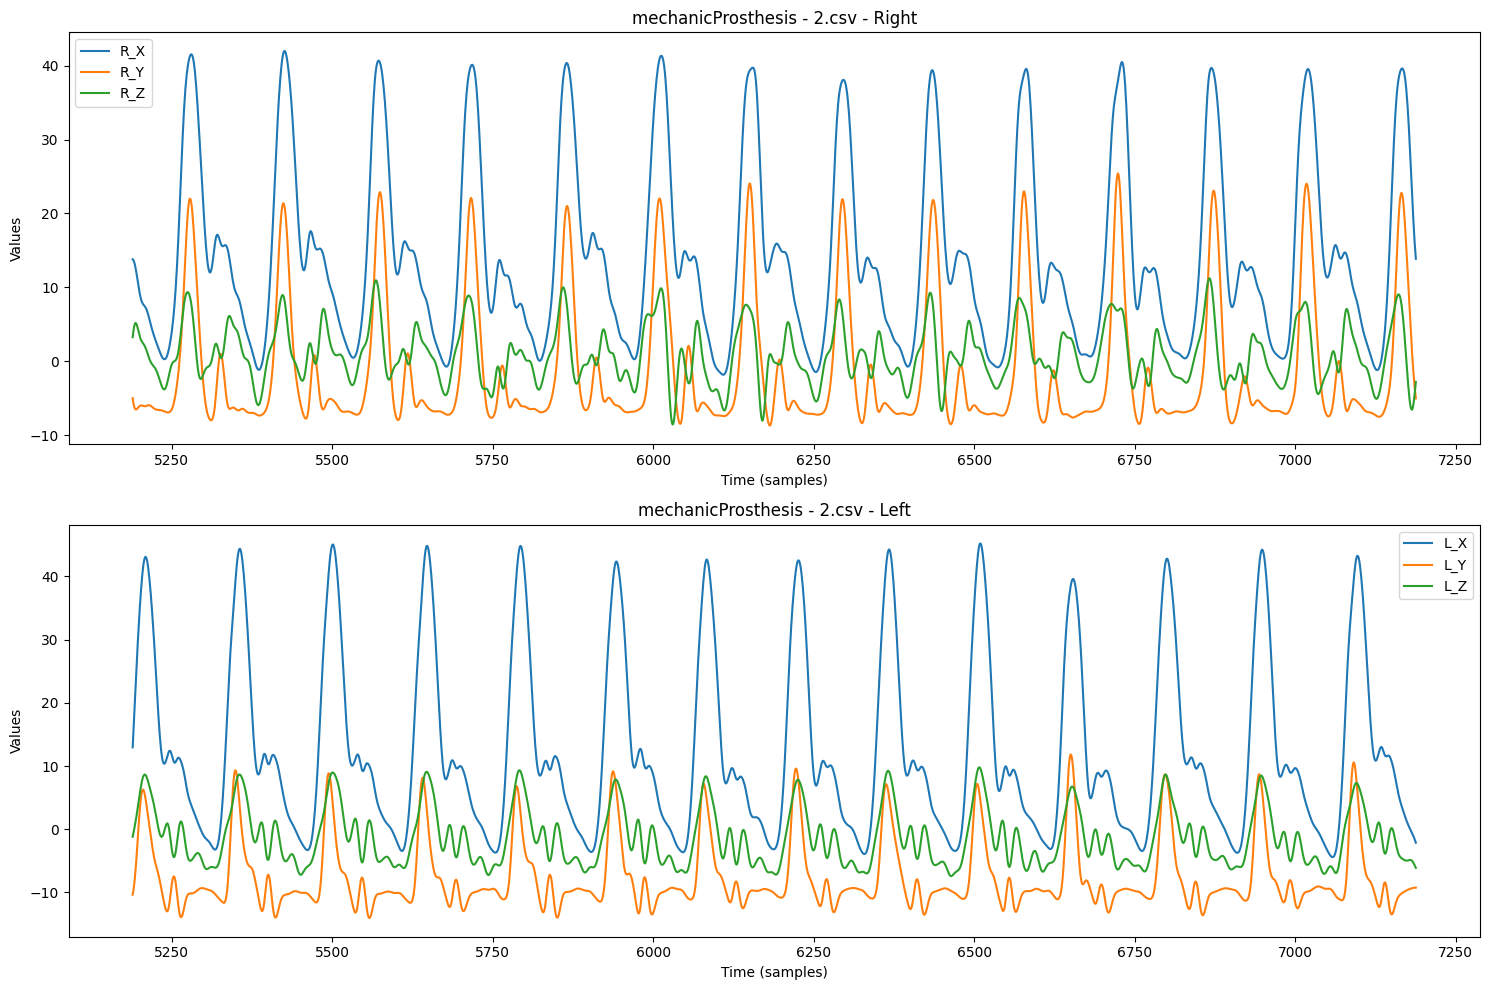

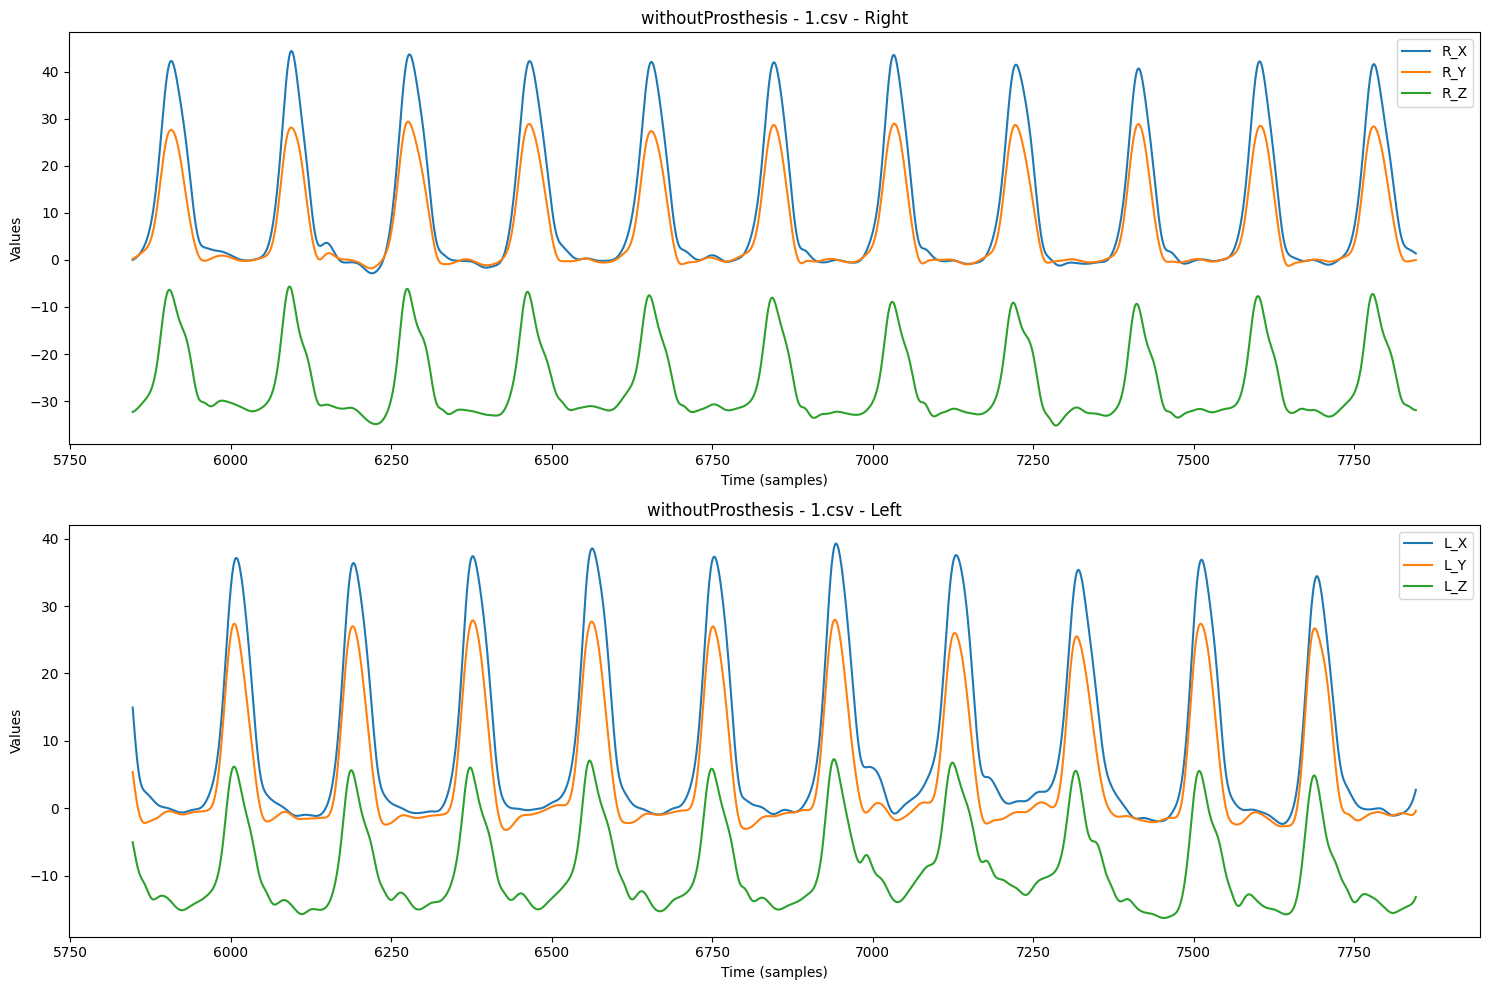

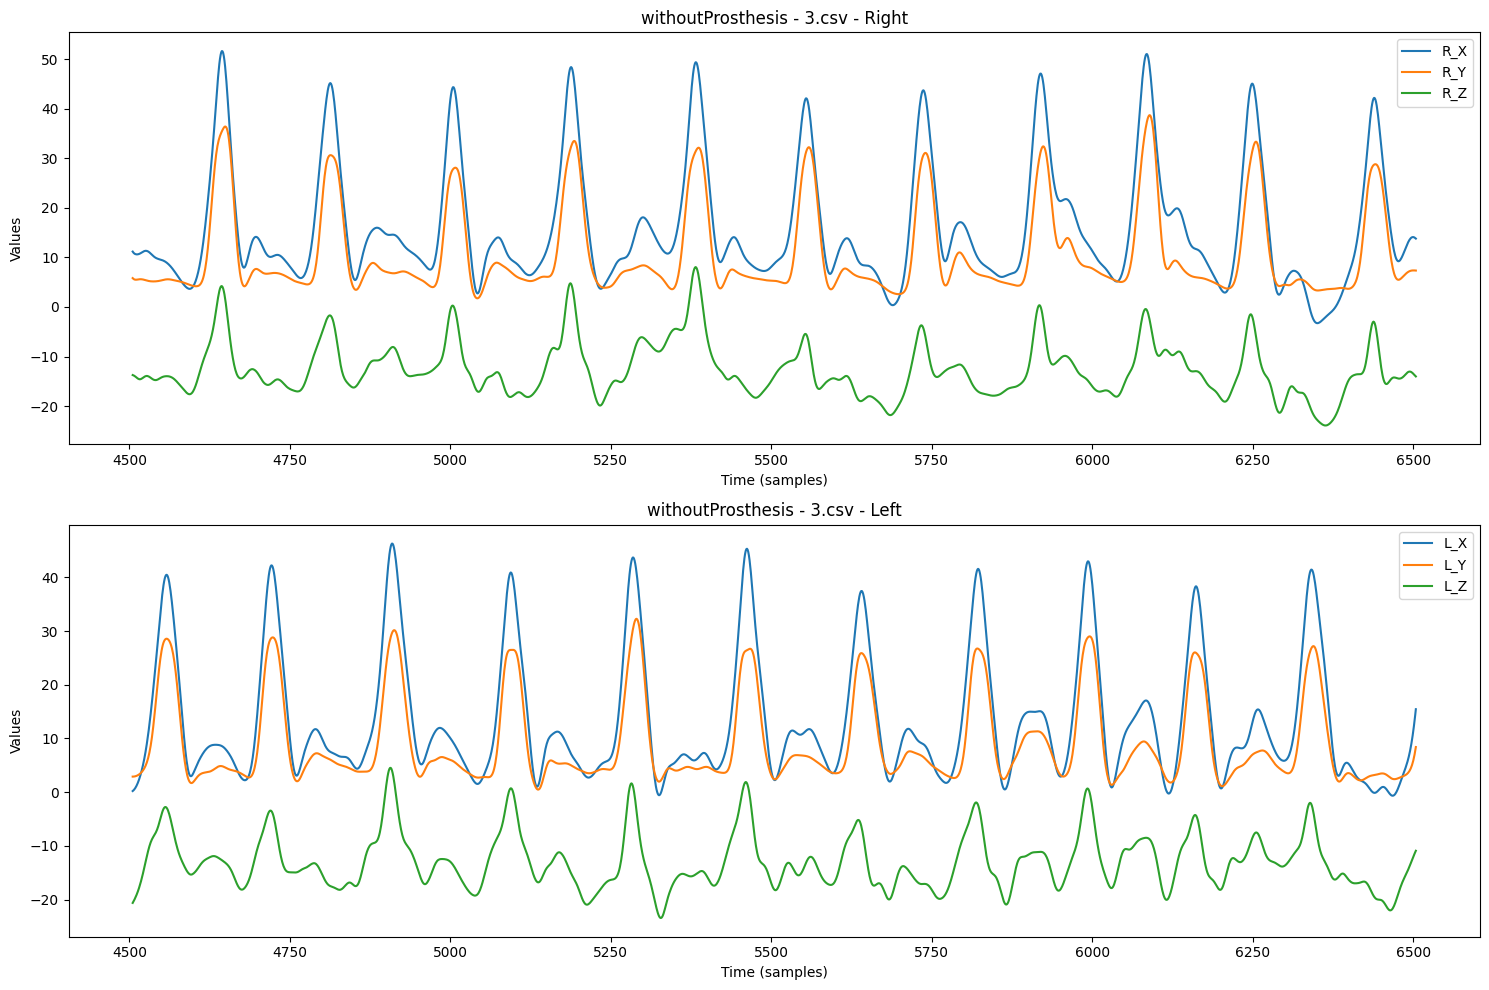

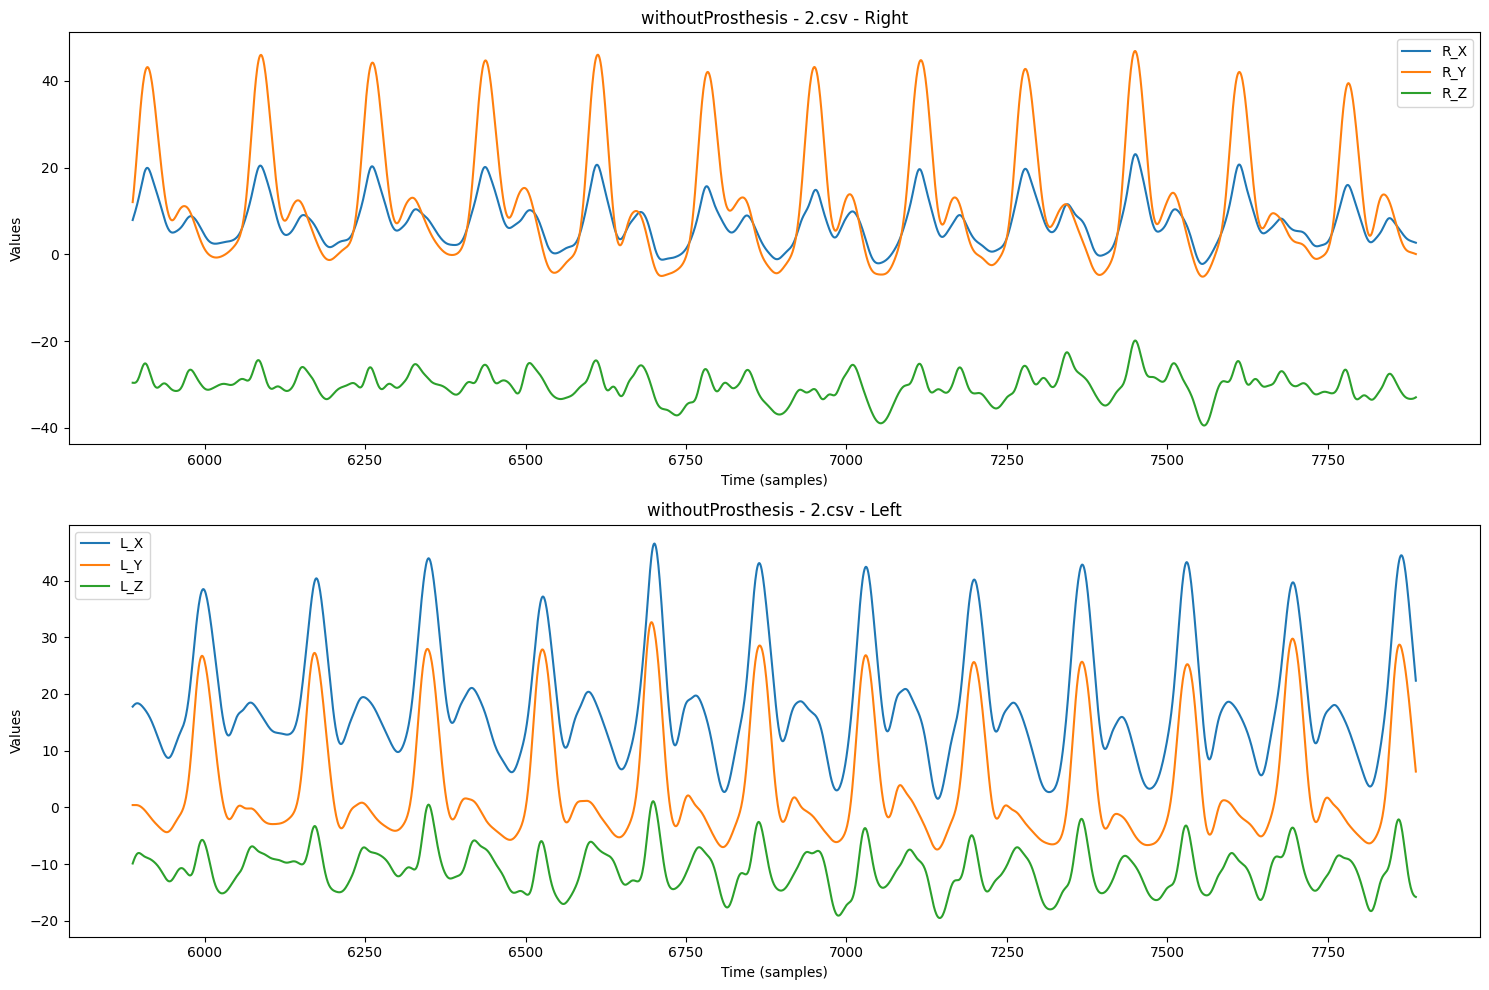

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Constants
sampling_rate = 100  # Hz
skip_seconds = 10
skip_records = skip_seconds * sampling_rate
display_records = 2000  # Number of records to display in the middle

# Define the directory containing the CSV files
directory = "../data/"
all_dirs = os.listdir(directory)
for dirs in all_dirs:
    curDirectory = directory + dirs

    # List all files in the directory
    all_files = os.listdir(curDirectory)

    # Filter out only CSV files
    csv_files = [file for file in all_files if file.endswith('.csv')]

    # Analyze each CSV file
    for file in csv_files:
        file_path = os.path.join(curDirectory, file)
        data = pd.read_csv(file_path)

        # Skip the first and last 1000 records, then select the middle 2000 records
        filtered_data = data.iloc[skip_records:-skip_records]
        mid_index = len(filtered_data) // 2
        start_index = max(0, mid_index - display_records // 2)
        end_index = min(len(filtered_data), mid_index + display_records // 2)
        display_data = filtered_data.iloc[start_index:end_index]

        # Plotting
        fig, axs = plt.subplots(2, 1, figsize=(15, 10))

        # Plot Rx, Ry, Rz
        axs[0].plot(display_data.index, display_data['R_X'], label='R_X')
        axs[0].plot(display_data.index, display_data['R_Y'], label='R_Y')
        axs[0].plot(display_data.index, display_data['R_Z'], label='R_Z')
        axs[0].set_title(f'{dirs} - {file} - Right')
        axs[0].set_xlabel('Time (samples)')
        axs[0].set_ylabel('Values')
        axs[0].legend()

        # Plot Lx, Ly, Lz
        axs[1].plot(display_data.index, display_data['L_X'], label='L_X')
        axs[1].plot(display_data.index, display_data['L_Y'], label='L_Y')
        axs[1].plot(display_data.index, display_data['L_Z'], label='L_Z')
        axs[1].set_title(f'{dirs} - {file} - Left')
        axs[1].set_xlabel('Time (samples)')
        axs[1].set_ylabel('Values')
        axs[1].legend()

        plt.tight_layout()
        plt.show()
